In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/from-data-entry-to-ceo-the-ai-job-threat-index/My_Data.csv


# ****Data Loading

In [47]:
df=pd.read_csv('/kaggle/input/from-data-entry-to-ceo-the-ai-job-threat-index/My_Data.csv')
df.head(10)

Job titiles AI Impact  Tasks  AI models  \
0         Communications Manager       98%    365       2546   
1                 Data Collector       95%    299       2148   
2                     Data Entry       95%    325       2278   
3                     Mail Clerk       95%    193       1366   
4             Compliance Officer       92%    194       1369   
5  Chief Executive Officer (CEO)       91%    153       1135   
6                      Therapist       90%    114        983   
7         Chief Strategy Officer       90%    184       1284   
8                          Admin       90%    253       2014   
9                  General Clerk       90%    242       1903   

   AI_Workload_Ratio                     Domain  
0           0.143362         Communication & PR  
1           0.139199                  Data & IT  
2           0.142669  Administrative & Clerical  
3           0.141288      Leadership & Strategy  
4           0.141709       Medical & Healthcare  
5           0.134802   Supply Chain & Logistics  
6           0.115972            Law Enforcement  
7           0.143302               Construction  
8           0.125621          Sales & Marketing  
9           0.127168                Hospitality

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job titiles        4706 non-null   object 
 1   AI Impact          4706 non-null   object 
 2   Tasks              4706 non-null   int64  
 3   AI models          4706 non-null   int64  
 4   AI_Workload_Ratio  4706 non-null   float64
 5   Domain             4706 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 220.7+ KB


In [49]:
df.describe()

Tasks    AI models  AI_Workload_Ratio
count  4706.000000  4706.000000        4706.000000
mean    400.708032  1817.678071                inf
std     311.564781  1086.853037                NaN
min       1.000000     0.000000           0.036585
25%     161.000000  1085.250000           0.137271
50%     270.000000  1577.500000           0.199281
75%     608.750000  2273.000000           0.260572
max    1387.000000  5666.000000                inf

# ****Feature Engineering

# Handling Missing Values

In [50]:
df['AI_Workload_Ratio'].fillna(df['AI_Workload_Ratio'].median(), inplace=True)
df['AI Impact'].fillna('Unknown', inplace=True)


# Encoding Categorical Features

In [51]:
label_encoder = LabelEncoder()
df['AI Impact'] = label_encoder.fit_transform(df['AI Impact'])
df = pd.get_dummies(df, columns=['Domain'], drop_first=True)


# Feature Engineering

In [52]:
df['AI_models_per_Task'] = df['AI models'] / df['Tasks']
df['AI_Workload_Product'] = df['AI models'] * df['AI_Workload_Ratio']

In [53]:
df['AI_Workload_Product'].fillna(df['AI_Workload_Product'].median(), inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Job titiles                      4706 non-null   object 
 1   AI Impact                        4706 non-null   int64  
 2   Tasks                            4706 non-null   int64  
 3   AI models                        4706 non-null   int64  
 4   AI_Workload_Ratio                4706 non-null   float64
 5   Domain_Communication & PR        4706 non-null   uint8  
 6   Domain_Construction              4706 non-null   uint8  
 7   Domain_Data & IT                 4706 non-null   uint8  
 8   Domain_Hospitality               4706 non-null   uint8  
 9   Domain_Law Enforcement           4706 non-null   uint8  
 10  Domain_Leadership & Strategy     4706 non-null   uint8  
 11  Domain_Medical & Healthcare      4706 non-null   uint8  
 12  Domain_Sales & Marke

# ****Exploratory Data Analysis

# Correlation heatmap

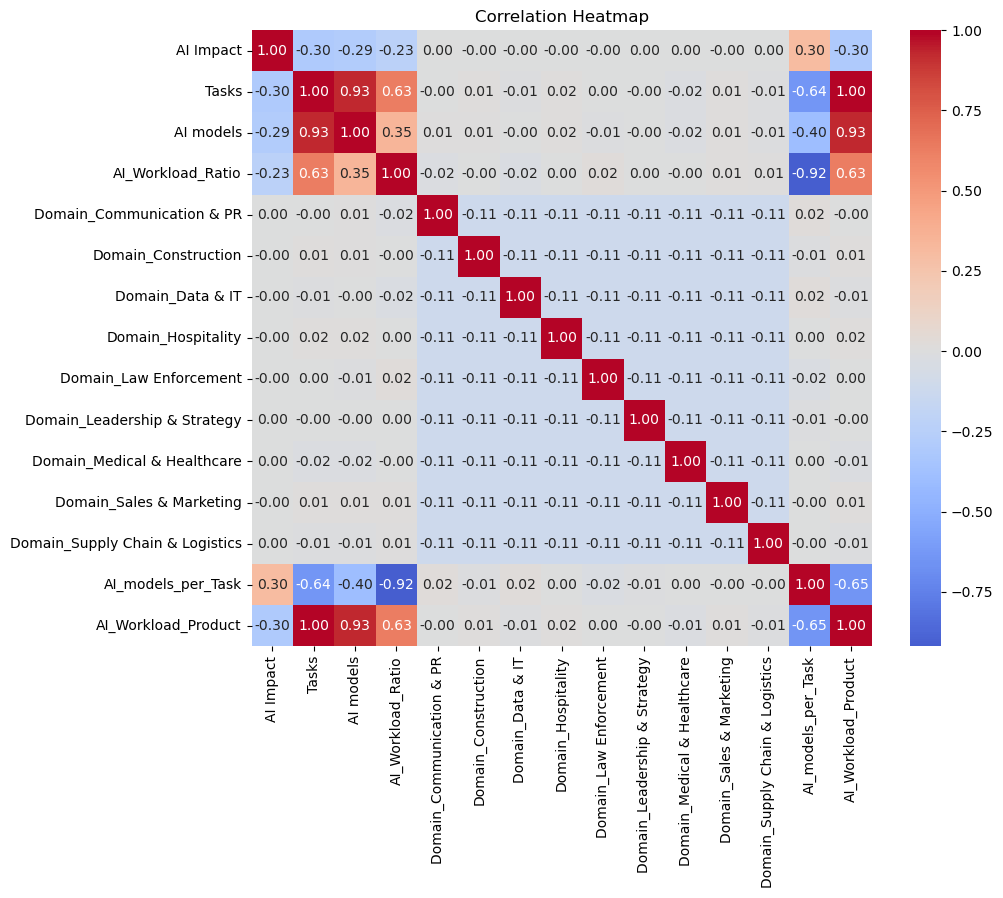

<Figure size 1200x1000 with 0 Axes>

In [55]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.clustermap(corr_matrix, annot=True, cmap='plasma', center=0, fmt=".2f")
plt.title('Clustermap of Correlation Matrix')
plt.show()

# Numerical columns


In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tasks', bins=20, kde=True)
plt.title('Distribution of Tasks')
plt.xlabel('Tasks')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AI models', bins=20, kde=True)
plt.title('Distribution of AI Models')
plt.xlabel('AI models')
plt.ylabel('Frequency')
plt.show()

#  Categorical vs. Numerical features

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Domain_Communication & PR', y='Tasks')
plt.title('Tasks Distribution by Communication & PR Domain')
plt.xlabel('Domain_Communication & PR')
plt.ylabel('Tasks')
plt.show()


plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='AI Impact', y='AI models')
plt.title('AI Models Distribution by AI Impact')
plt.xlabel('AI Impact')
plt.ylabel('AI models')
plt.show()

# Top Job Titles Most Impacted by AI

In [58]:
top_20_impacted_jobs = df.sort_values(by='AI Impact', ascending=False).head(20)

plt.figure(figsize=(22, 8))
sns.barplot(x='AI Impact', y='Job titiles', data=top_20_impacted_jobs, palette='viridis')
plt.title('Top Job Titles Most Impacted by AI', fontsize=15)
plt.xlabel('AI Impact (%)', fontsize=12)
plt.ylabel('Job Titles', fontsize=12)
plt.show()

# (Scatter Matrix) Relationships between numerical features

In [59]:
sns.pairplot(df, hue='AI Impact', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Distribution of AI Impact by Domain

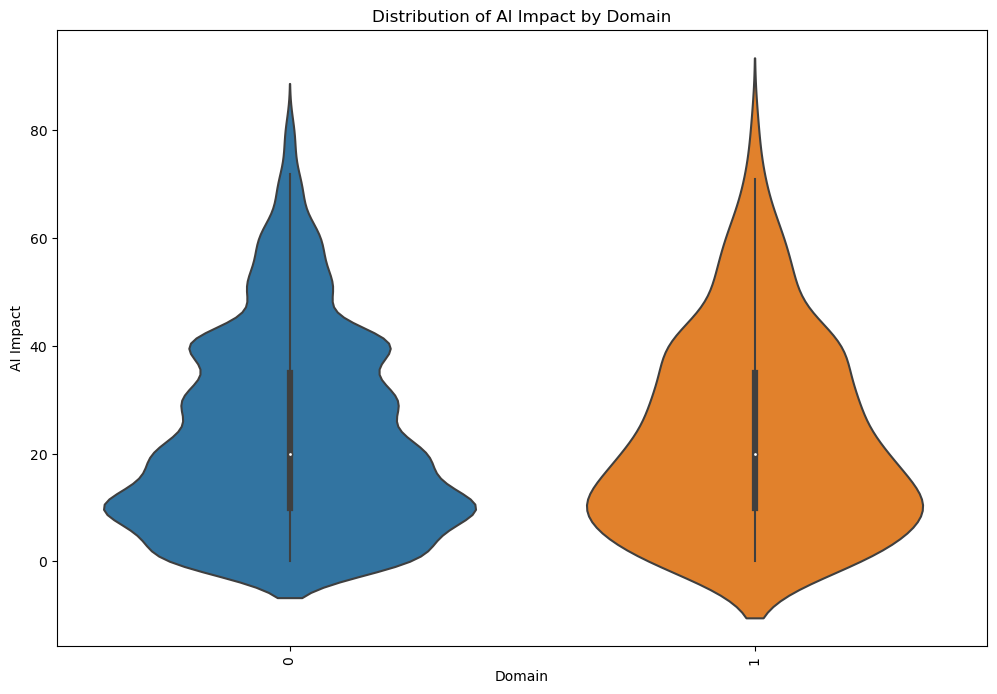

In [60]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Domain_Communication & PR', y='AI Impact')
plt.title('Distribution of AI Impact by Domain')
plt.xlabel('Domain')
plt.ylabel('AI Impact')
plt.xticks(rotation=90)
plt.show()

# AI Impact

In [61]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='AI Impact', y='AI models')
plt.title('Box Plot of AI Models by AI Impact')
plt.xlabel('AI Impact')
plt.ylabel('AI models')
plt.show()


# Distribution of AI_Workload_Product by AI Impact

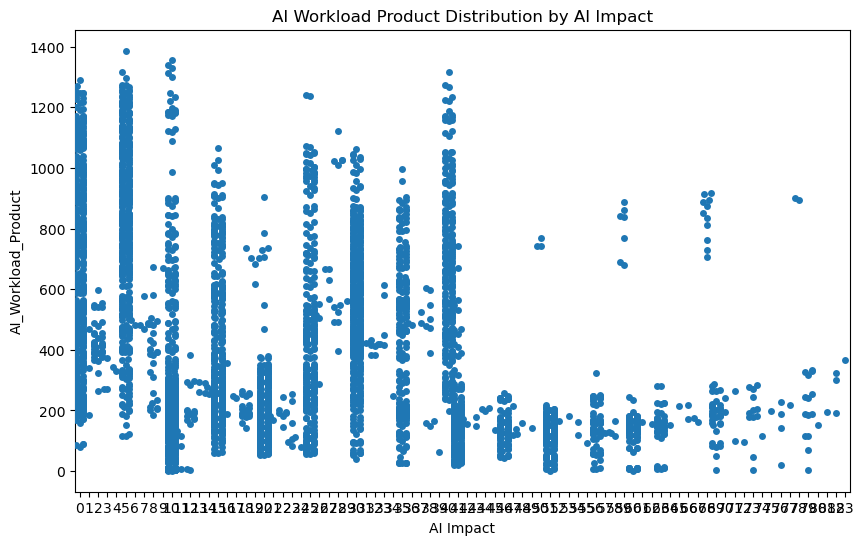

In [62]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='AI Impact', y='AI_Workload_Product')
plt.title('AI Workload Product Distribution by AI Impact')
plt.xlabel('AI Impact')
plt.ylabel('AI_Workload_Product')
plt.show()

# Scatter Matrix with Regression Line

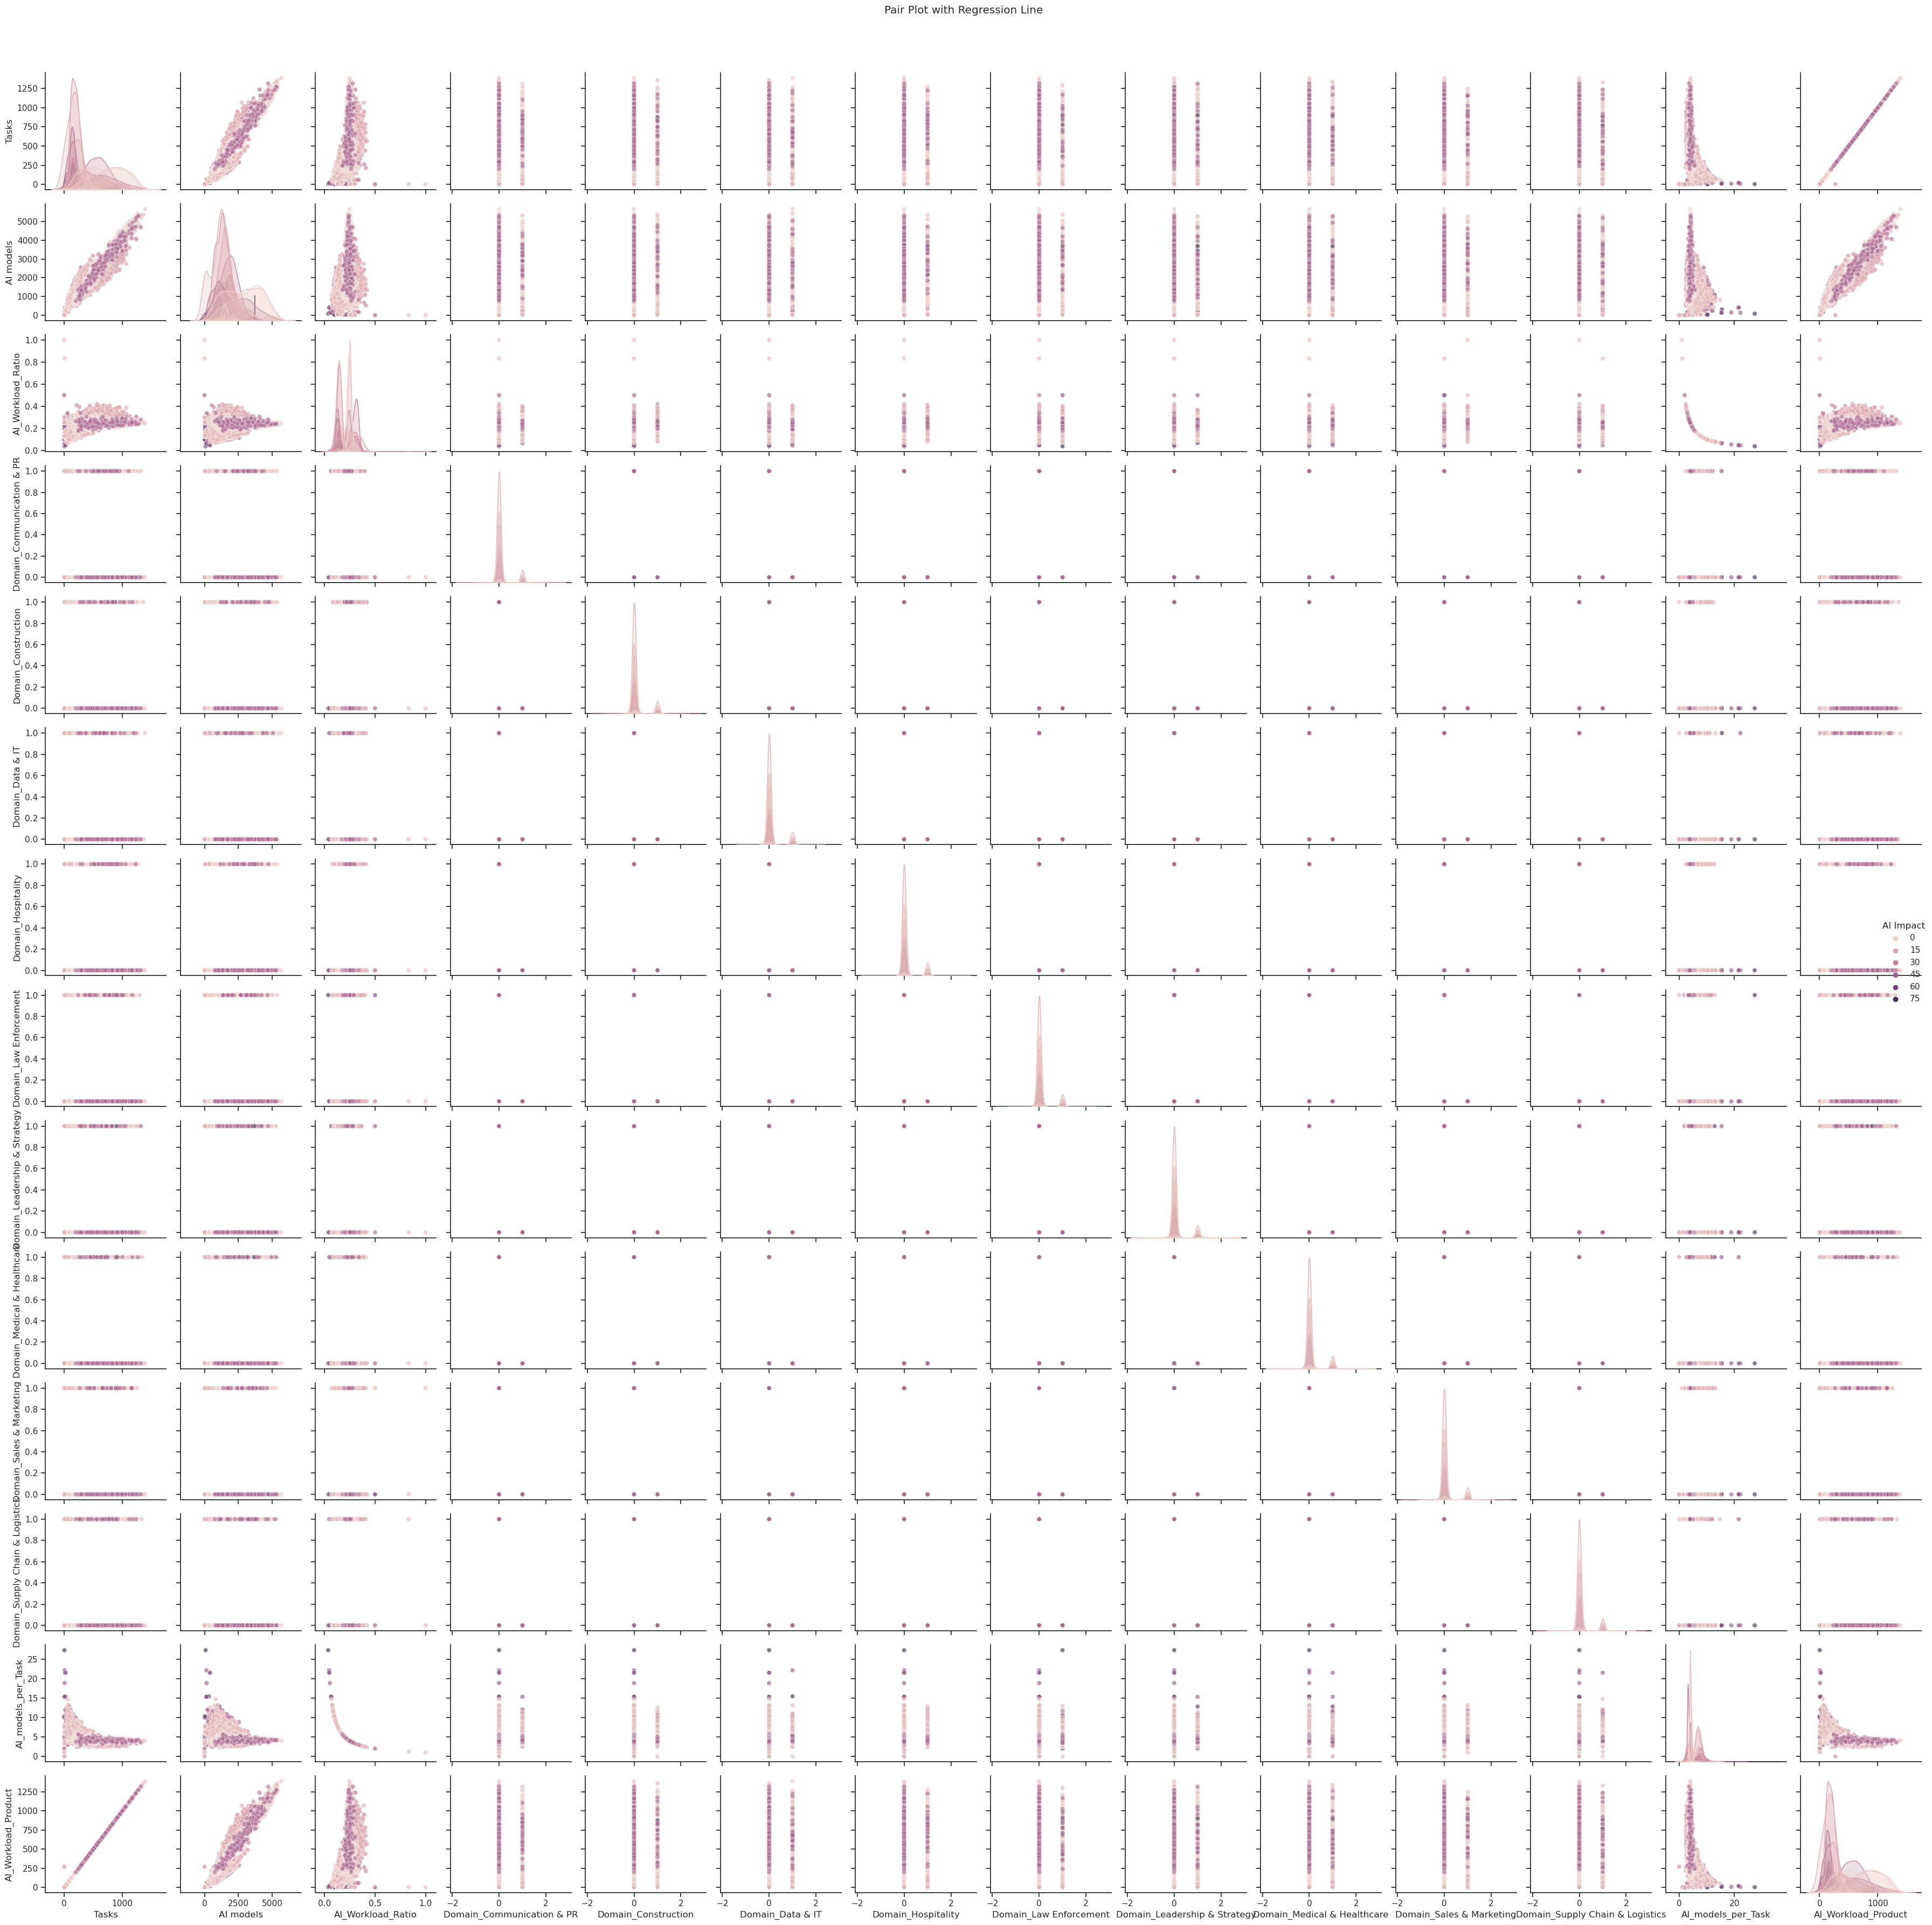

In [64]:
df['AI_Workload_Product'].fillna(df['AI_Workload_Product'].median(), inplace=True)

g = sns.pairplot(df, diag_kind='kde', hue='AI Impact', plot_kws={'alpha': 0.6})

# Iterate over the axes and add regression lines
for ax in g.axes.flat:
    if ax.get_title() != '':
        sns.regplot(data=df, x=ax.get_xbound()[1], y=ax.get_ybound()[1], ax=ax, scatter=False, color='red')

# Adjust the layout and display the plot
plt.suptitle('Pair Plot with Regression Line', y=1.02)
plt.tight_layout()
plt.show()

# Distribution Plot with KDE and Histogram

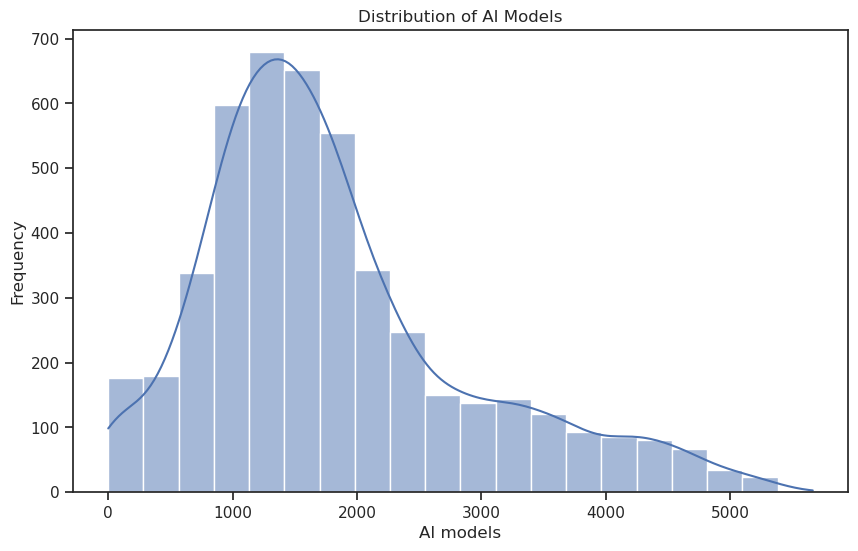

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AI models', kde=True, bins=20)
plt.title('Distribution of AI Models')
plt.xlabel('AI models')
plt.ylabel('Frequency')
plt.show()


# Correlation with Target Variable

In [66]:
correlation_with_target = df.corr()['AI Impact'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index)
plt.title('Correlation with Target Variable (AI Impact)')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()

# Parallel Coordinates Plot

In [68]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12, 8))
parallel_coordinates(normalized_df.assign(**{'AI Impact': df['AI Impact']}),
                     class_column='AI Impact', colormap=plt.cm.get_cmap('coolwarm'))
plt.title('Parallel Coordinates Plot')
plt.show()